In [38]:
### Predictive Modeling Exercise

# Import libraries necessary for this project
%matplotlib inline
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [56]:
# Load practice data
dataset = pd.read_csv("~/brunoa/Predictive Modeling/Data/wineQualityReds.csv", sep=',',index_col=0)
dataset.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
# Describe dataset
print dataset.describe()

       fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [40]:
# Define Target (y) and Features (X)
X = dataset.iloc[:, 0:11].values
y = dataset.iloc[:, 11].values
features = dataset.columns[0:11]

In [41]:
# Split data into train and test
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### 1. Logistic Regression ---------------------------------------------------------
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

#Command to see all the configurable parameters of this model
lr.get_params().keys()

['warm_start',
 'C',
 'n_jobs',
 'verbose',
 'intercept_scaling',
 'fit_intercept',
 'max_iter',
 'penalty',
 'multi_class',
 'random_state',
 'dual',
 'tol',
 'solver',
 'class_weight']

In [42]:
#Fitting the model
lr.fit(X_train, y_train) #Use train sample for fitting
lr.predict(X_test) #Create predictions for test sample
round(lr.score(X_test,y_test), 4)

0.5568

In [43]:
# Confusion Matrix
y_pred_lr = lr.predict(X_test) 
lr_confusion = pd.crosstab(y_test, y_pred_lr, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(lr_confusion)

Predicted  4    5    6  7  All
Actual                        
3          0    2    0  0    2
4          0   16    6  1   23
5          1  156   51  1  209
6          1   81  138  5  225
7          0    2   62  0   64
8          0    0    4  1    5
All        2  257  261  8  528


In [44]:
### 2. Decision Tree ---------------------------------------------------------
tree = DecisionTreeClassifier(random_state=0)
# Define Tree Parameters
tree_params = {
    'max_depth': range(1, 9)
}
# Cross Validation with Grid Search
tree_cv = GridSearchCV(estimator=tree,
                     param_grid=tree_params,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
# Command to see all the configurable parameters of this model
tree.get_params().keys()

['presort',
 'splitter',
 'min_impurity_decrease',
 'max_leaf_nodes',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth',
 'class_weight']

In [45]:
# Fitting the model
tree_cv.fit(X, y) #fits a tree to X,y
tree_cv_results = pd.DataFrame(tree_cv.cv_results_) #estimation results transformed to a pd.dataframe

/home/udocker/phoenix-worker/environments/python2/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
# Get the parameters of the best model
best_parameters = tree_cv.best_params_
print(best_parameters)
#Get the accuracy of the best model
best_result = tree_cv.best_score_
print(best_result)

{'max_depth': 3}
0.5628517823639775


In [47]:
# Confusion Matrix
y_pred_tree = tree_cv.predict(X_test) 
tree_confusion = pd.crosstab(y_test, y_pred_tree, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(tree_confusion)

Predicted    5    6   7  All
Actual                      
3            2    0   0    2
4           14    9   0   23
5          150   57   2  209
6           87  127  11  225
7            6   36  22   64
8            1    2   2    5
All        260  231  37  528


In [48]:
### 3. Random Forest ---------------------------------------------------------
rf = RandomForestClassifier(random_state=0)
# Define RF Parameters
rf_params = {
    'n_estimators': [300, 500, 700, 900],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 9),
    'bootstrap': [True, False]
}
# Cross Validation with Grid Search
rf_cv = GridSearchCV(estimator=rf,
                     param_grid=rf_params,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
# Command to see all the configurable parameters of this model
rf.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'min_impurity_decrease',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth',
 'class_weight']

In [49]:
# Fitting the model
rf_cv.fit(X, y) #fits a tree to X,y
rf_cv_results = pd.DataFrame(rf_cv.cv_results_) #estimation results transformed to a pd.dataframe

/home/udocker/phoenix-worker/environments/python2/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
# Get the parameters of the best model
best_parameters = rf_cv.best_params_
print(best_parameters)
# Get the accuracy of the best model
best_result = rf_cv.best_score_
print(best_result)

{'n_estimators': 300, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 6}
0.592245153220763


Text(0.5,0,'Relative Importance')

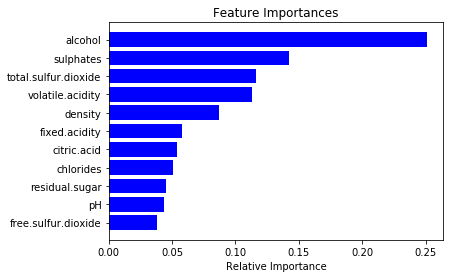

In [51]:
# Plot feature importance
importances = rf_cv.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [52]:
# Confusion Matrix
y_pred_rf = rf_cv.predict(X_test) 
rf_confusion = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(rf_confusion)

Predicted    5    6   7  All
Actual                      
3            1    1   0    2
4           16    7   0   23
5          172   37   0  209
6           44  180   1  225
7            1   30  33   64
8            0    4   1    5
All        234  259  35  528


In [53]:
### 4. XGB ---------------------------------------------------------
xgb = XGBClassifier(random_state=0)
#Define XGB Parameters
xgb_params = {
    'learning_rate': [0.1, 0.3],
    'min_child_weight': [0.5, 1],
    'n_estimators': [300, 500, 700],
    'max_depth': range(1, 9)
}
# Cross Validation with Grid Search
xgb_cv = GridSearchCV(estimator=xgb,
                     param_grid=xgb_params,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
# Command to see all the configurable parameters of this model
xgb.get_params().keys()

['reg_alpha',
 'n_jobs',
 'colsample_bytree',
 'silent',
 'colsample_bylevel',
 'scale_pos_weight',
 'learning_rate',
 'missing',
 'max_delta_step',
 'nthread',
 'base_score',
 'n_estimators',
 'subsample',
 'reg_lambda',
 'random_state',
 'min_child_weight',
 'objective',
 'seed',
 'max_depth',
 'gamma',
 'booster']

In [54]:
# Fitting the model
xgb_cv.fit(X, y) #fits a tree to X,y
xgb_cv_results = pd.DataFrame(xgb_cv.cv_results_) #estimation results transformed to a pd.dataframe

/home/udocker/phoenix-worker/environments/python2/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
# Get the parameters of the best model
best_parameters = xgb_cv.best_params_
print(best_parameters)
# Get the accuracy of the best model
best_result = xgb_cv.best_score_
print(best_result)

{'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1}
0.574108818011257


Text(0.5,0,'Relative Importance')

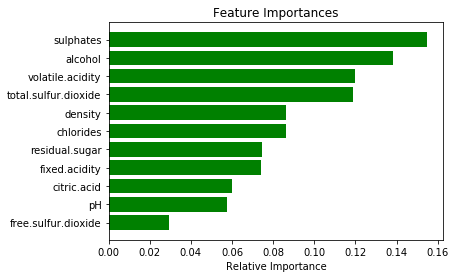

In [25]:
# Plot feature importance
importances = xgb_cv.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [37]:
# Confusion Matrix
y_pred_xgb = xgb_cv.predict(X_test) 
xgb_confusion = pd.crosstab(y_test, y_pred_xgb, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(xgb_confusion)

Predicted  4    5    6   7  All
Actual                         
3          0    2    0   0    2
4          0   17    5   1   23
5          1  160   47   1  209
6          0   59  155  11  225
7          0    2   36  26   64
8          0    0    3   2    5
All        1  240  246  41  528
